In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from sklearn 

In [ ]:
from sklearn.datasets import load_boston
"""Our dataset is boston city in Massachusetts famously know for boston tea party
    With the help of data you have to predict the price of house in Boston
    
"""

In [ ]:
boston = load_boston()

In [22]:
# type(boston) #type is sklearn bunch => dict keys & values

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# Lets check the key:DESCR values
print(boston['DESCR'])

In [ ]:
print(boston.data)

# Since data is nested loop understand it and try to find first element
# print(boston.data[0]) 
# This gives single list having 13 features values we total have 506 such list

In [36]:
# This to check price our goal is to find price i.e. target here to similar to our calculated 
print(boston.target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [37]:
print(boston.feature_names)
boston.feature_names[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


'CRIM'

# Prepare the dataset 
- It's the 3rd step in 7 ML steps, sometimes it's also reffered as EDA **Exploratory Data Analysis**

In [ ]:
dataset = pd.DataFrame(boston.data)

#Check what is DataFrame and various method's of it 

In [ ]:
dataset

In [ ]:
dataset.head()

#Gives only first 5 data

In [ ]:
# Q.Can we change our column number to their names? 
# A. Our DataFrame has parameter column in which we can pass our required argument to set as column name

dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset.head()

In [ ]:
# Q. Can we add output dependent variable in dataframe?
# A. You can it's same as adding key with it's values but size should same

dataset['Price'] = boston.target
dataset.head()

In [ ]:
dataset.info()

# This gives us clear understanding of each column and row are any null(blank) values present

In [ ]:
dataset.describe()

# Finding out stats measures of our dat

In [ ]:
dataset.isnull()
# dataset.isnull().sum()

"""Whenever you get dataset check whether it's have missing value the info just give idea is there present null or not
But to find exactly where null value is present you should use isnull() method 
dataset.isnull().sum() just helps in counting and displaying the null 
""" 

In [ ]:
### Exploratory Data Analysis:- ###

"""

############
Cor-relation When you are dealing with regression problem try to find correlation 
############          
1. Between Independent features aka Multicollinearity: How & which independent features are inter-related with each other
2. Between Independent and Output features: Which independent features are related with output and what factor

"""

dataset.corr()
# Move cursor over corr() see it's parameter pearson is most powerful way to find correlation
# Values ranges between -1,0,1 {-1: Highly -ve dependent, 0: No dependence, 1: Highly postively dependent}


In [ ]:
# Since we are not able to properly figure out correlation we are going to plot various graph to get better vizualization

import seaborn as sns
sns.pairplot(dataset)

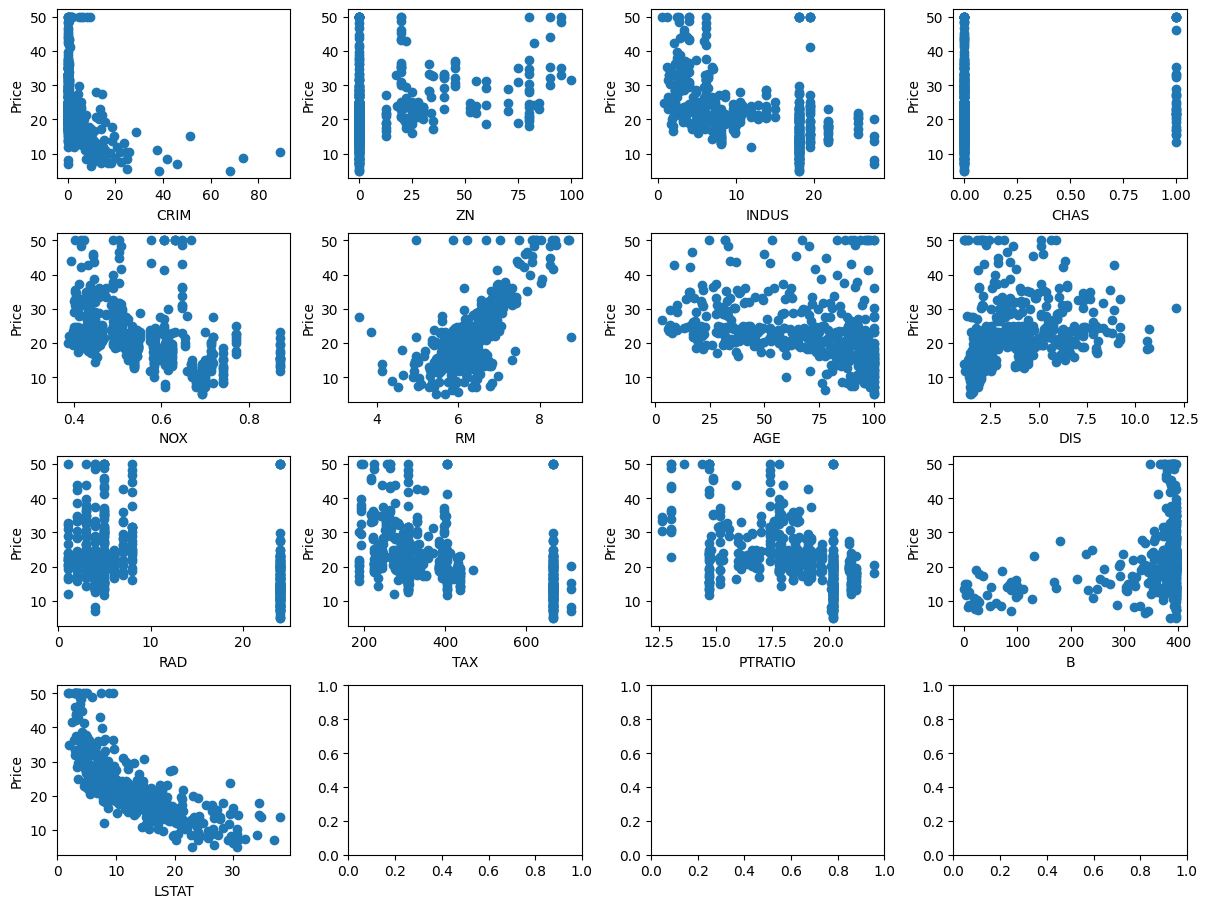

In [59]:
#Since it's difficult to understand from graph we can create some individual graphs of Independent vs Dependent. Later you can try to find Multicollinearity i.e. releation between independent

fig,axs = plt.subplots(4,4,figsize=(12, 9),layout="constrained")
for count,ax in enumerate(axs.flat):
    if count<13:
        ax.scatter(dataset[boston.feature_names[count]],dataset['Price'])
        ax.set_xlabel(boston.feature_names[count])
        ax.set_ylabel("Price")
    else:
        break
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0,wspace=0)


<Axes: xlabel='RM', ylabel='Price'>

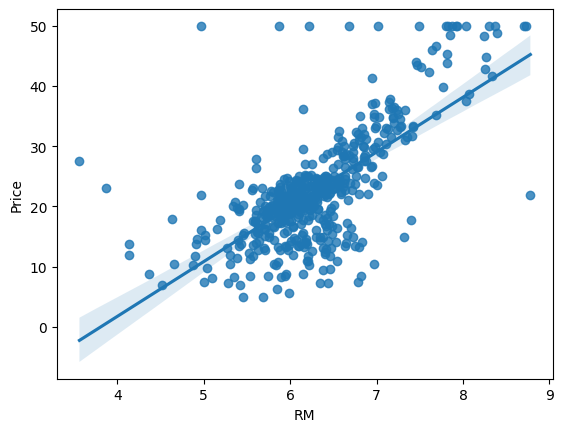

In [70]:
# Since with the help of plot we are ablt to find independent vs dependent correlation i.e. RM & LSTAT has releation with Price.
# We also have some seaborn features that help in visualization how a ideal regression pattern should happen between features.

import seaborn as sns
sns.regplot(x="RM",y='Price',data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

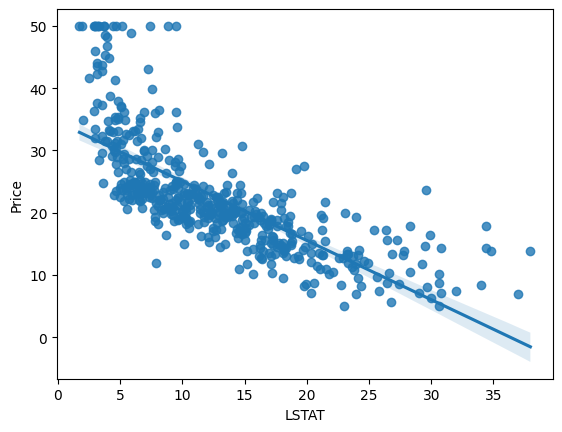

In [75]:
import seaborn as sns
sns.regplot(x="LSTAT",y='Price',data=dataset)

# This both plot show how is regression pattern between them!